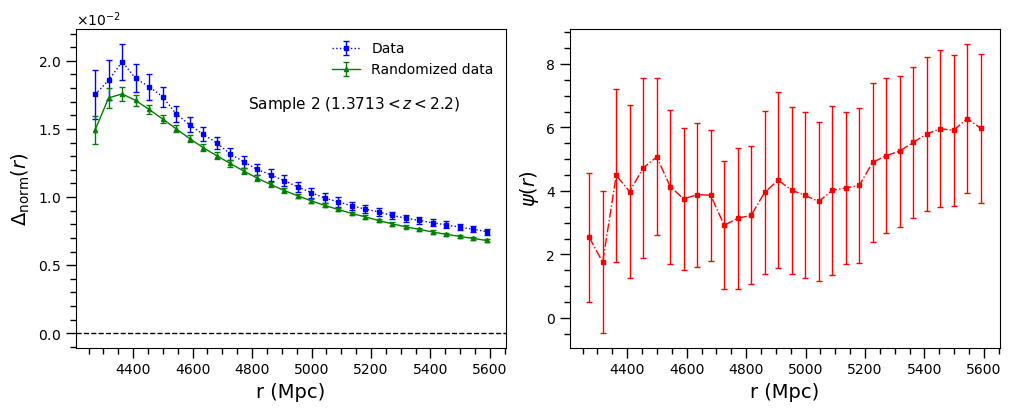

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
import os
output_dir = "../../../../results/supplementary_plots"
os.makedirs(output_dir, exist_ok=True)

# Load data
f_name1 = 'inter_data1/sample_2_criteria_err.csv'
df1 = pd.read_csv(f_name1)
R = df1['r'].to_numpy()
cri = df1['crit'].to_numpy()
d_cri = df1['sd'].to_numpy()

f_name2 = 'inter_data2/sample_rand_2_criteria.csv'
df2 = pd.read_csv(f_name2)
R_rand = df2['r'].to_numpy()
cri_rand = df2['crit'].to_numpy()
d_cri_rand = df2['sd'].to_numpy()

# Compute normalized difference and error
new_cri = (cri - cri_rand) / d_cri_rand
d_new_cri = np.sqrt(d_cri**2 + d_cri_rand**2) / d_cri_rand

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Panel 1: Δ_crit vs r
ax = axes[1]
ax.set_xlabel("r (Mpc)", fontsize=14)
ax.set_ylabel(r"$\psi (r)$", fontsize=14)
ax.errorbar(R, new_cri, yerr=d_new_cri, ls='-.', lw=1, marker='s', markersize=3,
            c='r', ecolor='r', elinewidth=1, capsize=2)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')

# Panel 0: Δ_norm vs r for data and randomized
ax = axes[0]
ax.set_xlabel("r (Mpc)", fontsize=14)
ax.set_ylabel(r"$\Delta_{\mathrm{norm}}(r)$", fontsize=14)

ax.errorbar(R, cri, yerr=d_cri, ls=':', lw=1, marker='s', markersize=3,
            c='b', ecolor='b', elinewidth=1, capsize=2, label='Data')
ax.errorbar(R, cri_rand, yerr=d_cri_rand, ls='-', lw=1, marker='^', markersize=3,
            c='g', ecolor='g', elinewidth=1, capsize=2, label='Randomized data')

ax.legend(fontsize=10, frameon=False)

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')

ax.text(0.4, 0.75, r"Sample 2 ($1.3713 < z < 2.2$)", transform=ax.transAxes, fontsize=11)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

plt.savefig("../../../../results/supplementary_plots/suppl_fig8_bottom.pdf", bbox_inches='tight')
plt.show()

In [ ]:
import shutil
shutil.rmtree('inter_data1')
shutil.rmtree('inter_data2')
   